**第10組**

**組員：焦玉茹、林元雅、劉雨瑈、周駿嚴**

# 動機和分析目的
動機和分析目的：每個人都有使用五倍券的權利，希望可以暸解大眾對於五倍券從綁定到領取以及最後使用，情緒上的變化以及看法。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


# **對PTT Gossip版的五倍券議題進行情緒分析**

# **1.安裝套件**

In [ ]:
%pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import re
import jieba
import jieba.analyse
from datetime import datetime
from wordcloud import WordCloud 

In [ ]:
# cloab 字體設定
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
# matplotlib.rc('font', family='Taipei Sans TC Beta')

--2021-12-03 02:33:56--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.189.113, 64.233.189.101, 64.233.189.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g4vtdf3nc9jpjc85s4d7ef2ojjc8retu/1638498825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-03 02:34:01--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g4vtdf3nc9jpjc85s4d7ef2ojjc8retu/1638498825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.2

# **2.資料前處理**

##**2.1基本資料介紹**


*   資料來源：文字平台收集PTT Gossip版2021-09-14 ~ 2021-11-14 所有文章
*   資料集：/content/drive/MyDrive/hw/期中報告資料 2/new五倍券_articleMetaData.csv
*   關鍵字：五倍券、數位、紙本、綁定、振興、紓困
*   資料時間：2021-09-14 ~ 2021-11-14





In [ ]:
#匯入資料
MetaData = pd.read_csv('/content/drive/MyDrive/期中專案報告/final五倍券/final五倍券rawdata/final五倍券.csv', encoding='UTF-8')
Reviews = pd.read_csv('/content/drive/MyDrive/期中專案報告/final五倍券/final五倍券rawdata/final五倍券comment.csv', encoding='UTF-8')

In [ ]:
print(f"共有 {MetaData.shape[0]} 篇文章") #(row,column)
MetaData.head(3)

共有 1214 篇文章


,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位30CM Ecup 胎嘎賀 打給賀。\n我大木啦。\n\n借一下，剛看到的圖。\nhtt...
1,Fw:[情報]振興五倍券官網,2021/09/15,04:22:08,https://www.ptt.cc/bbs/Gossiping/M.1631679729....,kinjk01,Gossiping,76,8,41,作者: yhls (曆仔) 看板: Lifeismoney\n標題: [情報] 振興五倍券官...
2,[新聞]振興五倍券官網上線加碼券連4周抽最多,2021/09/15,05:53:39,https://www.ptt.cc/bbs/Gossiping/M.1631685223....,kinjk01,Gossiping,34,5,20,聯合報\n陳熙文\n振興五倍券官網上線 加碼券連4周抽 最多有4次中籤機會\n行政院推動振興...


In [ ]:
print(f"共有 {Reviews.shape[0]} 個留言")
Reviews.head(3)

共有 58906 個留言


,artTitle,artDate,artTime,artUrl,artPoster,artCat,cmtPoster,cmtStatus,cmtDate,cmtContent
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,boulard,→,2021-09-15 02:40:00,:11個
1,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,jjjjjjs,噓,2021-09-15 02:41:00,:只要妳有11個工具人
2,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,terrence7539,噓,2021-09-15 03:04:00,:結果還買到機王


In [ ]:
# 再篩一次文章
keywords = ['五倍券','數位','綁定','紙本','振興','紓困']
toMatch = '|'.join(keywords)

In [ ]:
MetaData = MetaData.loc[MetaData['sentence'].str.contains(toMatch) | MetaData['artTitle'].str.contains(toMatch), :]
MetaData.reset_index(inplace=True, drop=True) #重設index
print(MetaData.shape)

(1213, 10)


In [ ]:
# 挑選文章對應的留言
Reviews = MetaData.iloc[:,0:-1].merge(Reviews.loc[:,["artUrl", "cmtContent"]], how = "left", on = 'artUrl')

In [ ]:
print(Reviews.shape)
Reviews.head(3)

(58908, 10)


,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,cmtContent
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,:11個
1,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,:只要妳有11個工具人
2,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,:結果還買到機王


##**2.2資料清理**


*   去除NA值
*   去除不是中文的字詞



In [ ]:
# 移除cmtContent為na值的資料
Reviews.dropna(subset = ["cmtContent"], inplace=True)

In [ ]:
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
MetaData.head(3)
#MetaData['sentence']

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...
1,Fw:[情報]振興五倍券官網,2021/09/15,04:22:08,https://www.ptt.cc/bbs/Gossiping/M.1631679729....,kinjk01,Gossiping,76,8,41,作者曆仔看板標題情報振興五倍券官網時間剛看官網已經開了下午預計唐鳳政委會出來說明當中關於各部...
2,[新聞]振興五倍券官網上線加碼券連4周抽最多,2021/09/15,05:53:39,https://www.ptt.cc/bbs/Gossiping/M.1631685223....,kinjk01,Gossiping,34,5,20,聯合報陳熙文振興五倍券官網上線加碼券連周抽最多有次中籤機會行政院推動振興五倍券於月日正式上路...


In [ ]:
Reviews['cmtContent'] = Reviews.cmtContent.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
Reviews.head(3)
#Reviews['cmtContent']

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,cmtContent
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,個
1,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,只要妳有個工具人
2,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,結果還買到機王


##**2.3文章斷詞**
中文文集我們使用 jieba 套件進行斷詞與移除停用字

In [ ]:
#設定繁體中文詞庫
jieba.set_dictionary('/content/drive/MyDrive/期中專案報告/final五倍券/dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('/content/drive/MyDrive/期中專案報告/final五倍券/dict/五倍券user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('/content/drive/MyDrive/期中專案報告/final五倍券/dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from /content/drive/MyDrive/期中專案報告/final五倍券/dict/dict.txt.big ...
Dumping model to file cache /tmp/jieba.uc8aa4f8437980ff185d56d622ecc8c27.cache
Loading model cost 2.545 seconds.
Prefix dict has been built successfully.


In [ ]:
def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [ ]:
MetaData['word'] = MetaData.sentence.apply(getToken)

In [ ]:
MetaData_token = MetaData.explode('word') # 將word欄位展開

In [ ]:
MetaData_token.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,胎嘎賀
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,給賀
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,大木


In [ ]:
Reviews['word'] = Reviews.cmtContent.apply(getToken)

In [ ]:
Reviews_token = Reviews.explode('word') # 將word欄位展開

In [ ]:
Reviews_token.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,cmtContent,word
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,個,NaN
1,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,只要妳有個工具人,妳有
1,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,只要妳有個工具人,工具


In [ ]:
# 合併斷詞後的本文與留言
data = pd.concat([MetaData_token.loc[:,["artDate","artUrl","word"]],Reviews_token.loc[:,["artDate","artUrl","word"]]],axis=0)
data.head()

,artDate,artUrl,word
0,2021/09/14,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,胎嘎賀
0,2021/09/14,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,給賀
0,2021/09/14,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,大木
0,2021/09/14,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,想必
0,2021/09/14,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,庫克


In [ ]:
#轉換日期格式
data['artDate'] = pd.to_datetime(data['artDate'], format="%Y/%m/%d")

In [ ]:
#計算每天不同字的詞頻
word_count = data.groupby(['artDate','word'],as_index=False).size()
word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_count = word_count[word_count['size']>3]  #過濾出現太少次的字
word_count.head(10)

,artDate,word,size
62540,2021-10-09,質量,389
14399,2021-09-22,政府,388
10693,2021-09-22,五倍券,335
12467,2021-09-22,塔綠班,321
16464,2021-09-22,綁定,305
58365,2021-10-09,塔綠班,303
58390,2021-10-09,外包,271
56785,2021-10-09,中國,256
59858,2021-10-09,政府,249
16056,2021-09-22,真的,242


# 3.lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

##**3.1準備LIWC字典**
*  全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版
*  分為正向情緒與負向情緒



In [ ]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"/content/drive/MyDrive/期中專案報告/final五倍券/dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])

In [ ]:
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

,word,sentiments
0,塔綠班,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1704,魅力,positive
1705,鮮明,positive
1706,鮮美,positive
1707,鼓勵,positive


##**3.2情緒字典與斷詞結果進行合併**
將情緒字典與斷詞結果進行合併。

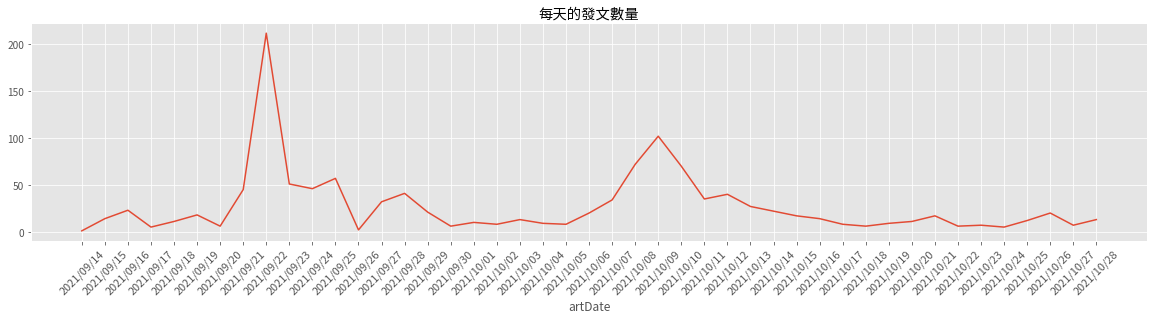

In [ ]:
data_datecount = pd.DataFrame(MetaData.groupby('artDate').size(),columns = ['count'])
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.figure(figsize=(20,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.title('每天的發文數量')
plt.xlabel('artDate')
plt.xticks(rotation= 45, fontsize=11)
plt.plot(data_datecount.index,data_datecount['count'].tolist())

可以先觀察每天的ptt文章數量，大約在9/21有較高的討論聲量，其次是10/8，而其他天討論聲量則是差不多。

##**3.3 正負向情緒分數聲量折線圖**
分別畫出文集中，正向（positive）與負向（negative）情緒的折線

In [ ]:
#文章和與LIWC情緒字典做合併
data_liwc = pd.merge(data, df_liwc, on=['word'],how='left')

#算出每天情緒總和(sentiment_count)
sentiment_count = data_liwc.groupby(['artDate','sentiments'],as_index=False).size()
sentiment_count.head()

,artDate,sentiments,size
0,2021-09-15,negative,179
1,2021-09-15,positive,57
2,2021-09-16,negative,207
3,2021-09-16,positive,142
4,2021-09-17,negative,48


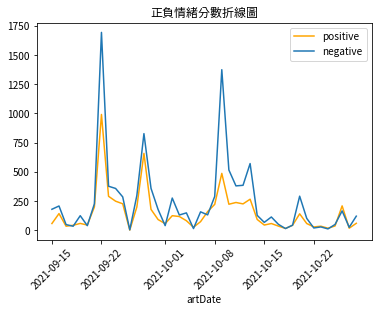

In [ ]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("default")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示
plt.title('正負情緒分數折線圖')
plt.plot(p['artDate'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['artDate'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #顯示圖例
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('artDate')
plt.show()

從上圖可以看出情緒主要以負面為主

##**3.4 正負向情緒分數比例折線圖**

In [ ]:
sentiment_count_r = sentiment_count.assign(ratio = sentiment_count.groupby(['artDate'], as_index=False)
                                           .apply(lambda x: x['size'] / sum(x['size'])).reset_index(level=0, drop=True))

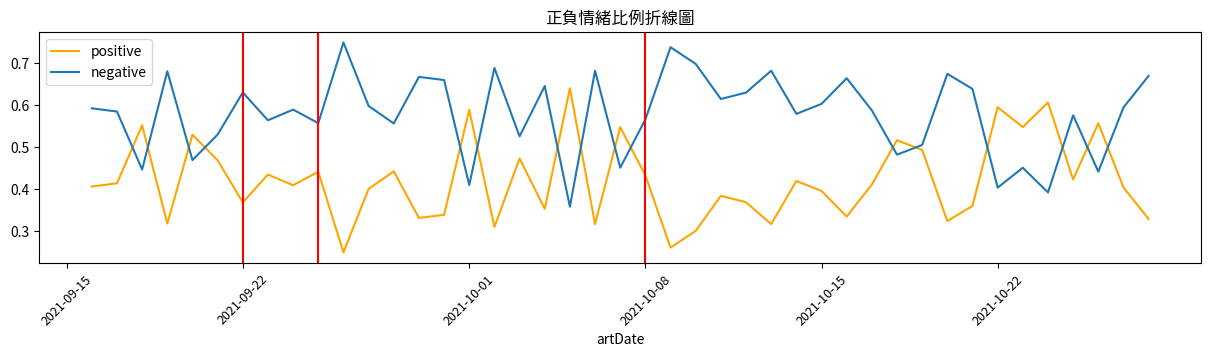

In [ ]:
sentiment_count_r = sentiment_count_r[sentiment_count_r['artDate'] > '2021/09/15']
p = sentiment_count_r[sentiment_count_r['sentiments']=='positive']
n = sentiment_count_r[sentiment_count_r['sentiments']=='negative']

plt.figure(figsize=(15,3))   # 顯示圖框架大小 (寬,高)
plt.style.use("default")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示
plt.title('正負情緒比例折線圖')
plt.plot(p['artDate'].tolist(), p['ratio'], label='positive',color="orange")
plt.plot(n['artDate'].tolist(), n['ratio'], label='negative')
plt.xticks(rotation= 45, fontsize=9)
plt.legend() #顯示圖例
plt.axvline(x=datetime.strptime('2021-09-22', "%Y-%m-%d"), color="red", ls="-")
plt.axvline(x=datetime.strptime('2021-09-25', "%Y-%m-%d"), color="red", ls="-")
plt.axvline(x=datetime.strptime('2021-10-08', "%Y-%m-%d"), color="red", ls="-")
#plt.axvline(x=datetime.strptime('2021-11-05', "%Y-%m-%d"), color="red", ls="-")
plt.xlabel('artDate')
plt.show()

##**3.5文字雲**
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [ ]:
def Wc_dict(df, Date, countB, countS):
    wc_df = (df.query('artDate == @Date') # 篩選日期
             .query('size < @countB')# 篩選最大數量
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #建立成dictionary
    
    return wc_dict

2021-09-22 文字雲

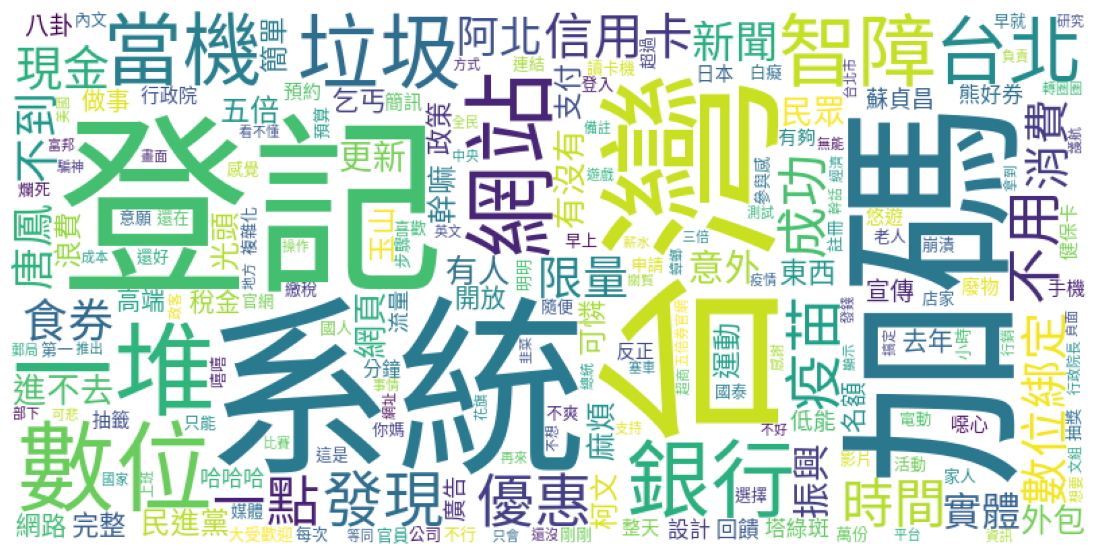

In [ ]:
dict_0922 = Wc_dict(word_count,"2021-09-22",200,5)

font = '/content/drive/MyDrive/期中專案報告1130/SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_0922)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

網站、登入、銀行、優惠、當機等詞彙可以看出在第一天開始登記民眾對於網站不堪負荷感到不滿，同時也關心各大銀行的優惠

2021-10-08 文字雲

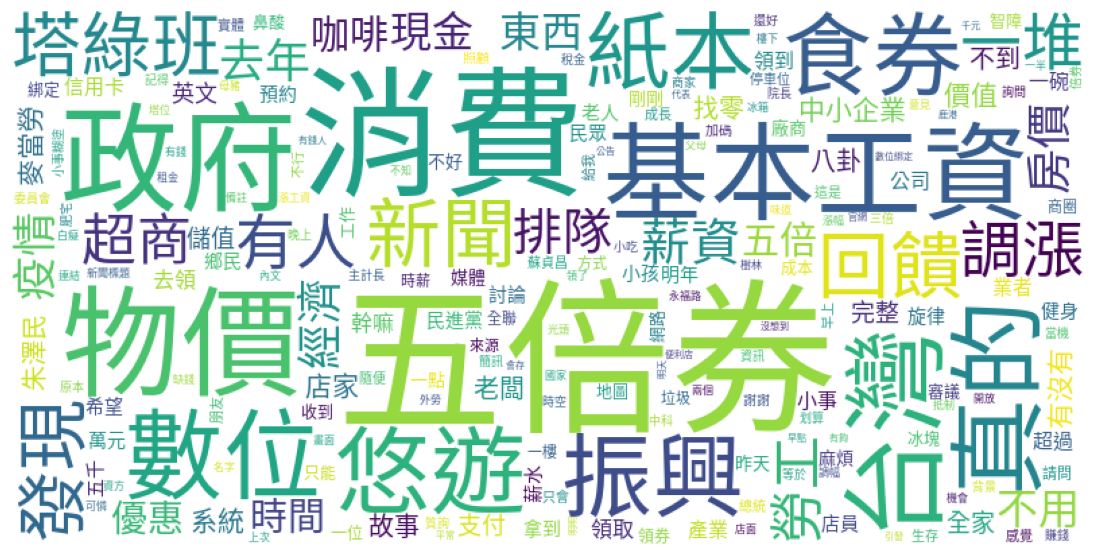

In [ ]:
dict_1008 = Wc_dict(word_count,"2021-10-08",200,5)

font = '/content/drive/MyDrive/期中專案報告1130/SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_1008)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

從物價、找零、超商、回饋等詞可以看出民眾已經開始領取且使用五倍券

2021-10-29 文字雲

In [ ]:
#dict_1029 = Wc_dict(word_count,"2021-10-29",200,5)

#font = '/content/drive/MyDrive/期中專案報告1130/SourceHanSansTW-Regular.otf' #中文字型路徑
#wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
#wordcloud.generate_from_frequencies(dict_1029)
#plt.figure(figsize = (14,7))
#plt.imshow(wordcloud)
#plt.axis("off") #把作圖的座標軸關掉 
#plt.show()

2021-11-05 文字雲

In [ ]:
#dict_1105 = Wc_dict(word_count,"2021-11-05",200,5)

#font = '/content/drive/MyDrive/期中專案報告1130/SourceHanSansTW-Regular.otf' #中文字型路徑
#wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
#wordcloud.generate_from_frequencies(dict_1105)
#plt.figure(figsize = (14,7))
#plt.imshow(wordcloud)
#plt.axis("off") #把作圖的座標軸關掉 
#plt.show()

##**3.6 情緒代表字**
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [ ]:
sentiment_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_sum = sentiment_sum.sort_values(by=['size'], ascending=False)  #排序
sentiment_sum.head()

,word,sentiments,size
51,塔綠班,negative,2206
50,垃圾,negative,806
22,優惠,positive,721
112,智障,negative,513
25,八卦,negative,379


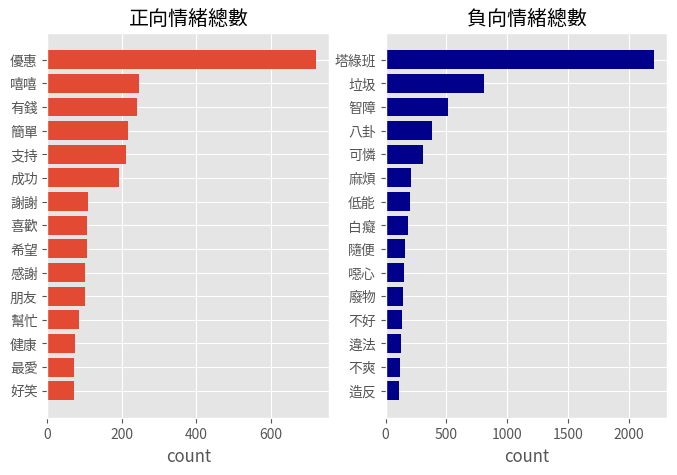

In [ ]:
matplotlib.rc('font', family='Taipei Sans TC Beta')
p_sum = sentiment_sum[sentiment_sum["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum[sentiment_sum["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Bet'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

從分析中可以看出大家可能對五倍券並不是特別滿意，負面詞彙數量遠大於正面數量


2021-09-22 正負情緒代表字

In [ ]:
sentiment_date_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['artDate', 'word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))

#篩選日期
sentiment_0922 = sentiment_date_sum[sentiment_date_sum['artDate']=="2021-09-22"].sort_values(by=['size'], ascending=False)
sentiment_0922.head()

,artDate,word,sentiments,size
102,2021-09-22,塔綠班,negative,321
101,2021-09-22,垃圾,negative,148
140,2021-09-22,智障,negative,143
84,2021-09-22,優惠,positive,127
127,2021-09-22,成功,positive,114


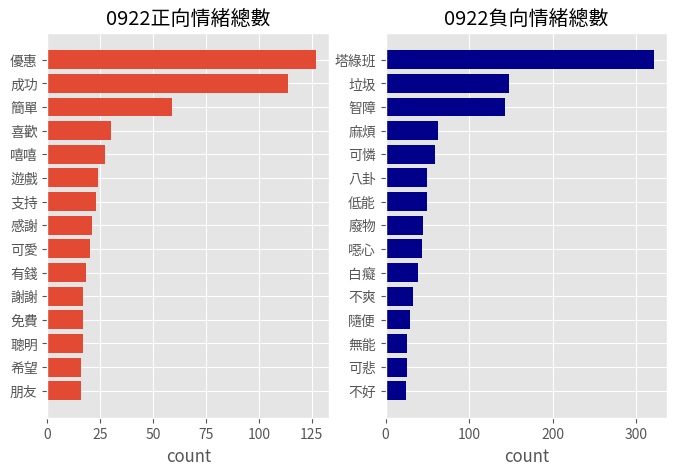

In [ ]:
p_sum = sentiment_0922[sentiment_0922["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0922[sentiment_0922["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示

plt.subplot(121)
plt.title('0922正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('0922負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

9/22開始數位綁定，民眾負面情緒大於正面情緒，網民可能對於五倍券以及執政黨有所不滿，但也可以看出不少正面情緒在討論優惠議題，民眾認為綁定流程簡單易懂

2021-10-08 正負情緒代表字

In [ ]:
sentiment_date_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['artDate', 'word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))

#篩選日期
sentiment_1010 = sentiment_date_sum[sentiment_date_sum['artDate']=="2021-10-08"].sort_values(by=['size'], ascending=False)
sentiment_1010.head()

,artDate,word,sentiments,size
535,2021-10-08,塔綠班,negative,32
527,2021-10-08,優惠,positive,23
529,2021-10-08,八卦,negative,18
536,2021-10-08,希望,positive,13
522,2021-10-08,不好,negative,12


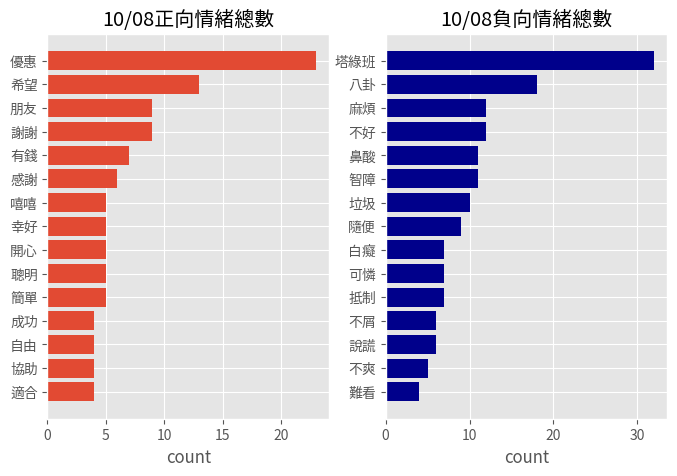

In [ ]:
p_sum = sentiment_1010[sentiment_1010["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_1010[sentiment_1010["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示

plt.subplot(121)
plt.title('10/08正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('10/08負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

10/08五倍券開始使用後民眾對於五倍券的負面情緒開始緩和，負面情緒詞開始降低，但負面詞還是較高

##**3.7 歸類正負面文章**
* 之前的情緒分析大部分是全部的詞彙加總，接下來將正負面情緒的文章分開，看看能不能發現一些新的東西。 
* 接下來歸類文章，將每一篇文章正負面情緒的分數算出來，然後大概分類文章屬於正面還是負面。



In [ ]:
article_type = (data.merge(df_liwc, on='word')
                .groupby(['artUrl', 'sentiments'], as_index=False)
                .size()
                .pivot_table(index='artUrl', columns='sentiments', values='size', fill_value=0)
                .reset_index(['artUrl'])
               )
article_type.head()

sentiments,artUrl,negative,positive
0,https://www.ptt.cc/bbs/Gossiping/M.1631679729....,16,2
1,https://www.ptt.cc/bbs/Gossiping/M.1631685223....,9,1
2,https://www.ptt.cc/bbs/Gossiping/M.1631686465....,3,0
3,https://www.ptt.cc/bbs/Gossiping/M.1631686915....,1,1
4,https://www.ptt.cc/bbs/Gossiping/M.1631700192....,3,1


In [ ]:
article_type['type'] = article_type.apply(lambda x: 'positive' if x['positive'] > x['negative'] else 'negative',axis=1)
article_type.groupby('type', as_index=False).size()

,type,size
0,negative,725
1,positive,414


**正負情緒文章數量統計圖**

In [ ]:
article_type_date = article_type.merge(MetaData.loc[:,["artUrl", "artDate"]], how = 'left', on = 'artUrl')
article_type_date = article_type_date.groupby(['artDate','type'], as_index=False).size()
#article_type_date

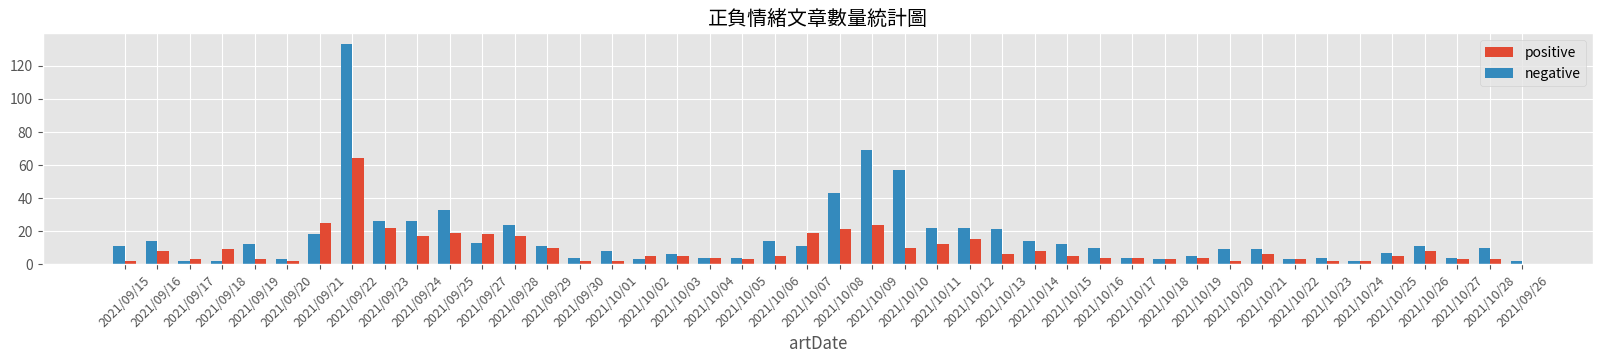

In [ ]:
ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["artDate"]>="2021/09/15")&(article_type_date["artDate"]<="2021/11/15")]
an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["artDate"]>="2021/09/15")&(article_type_date["artDate"]<="2021/11/15")]

plt.figure(figsize=(20,3))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('artDate')
plt.bar(ap['artDate'],ap['size'],align="edge",width=0.35,label="positive")
plt.bar(an['artDate'],an['size'],align="edge",width=-0.35,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('artDate')
plt.show()

##**3.8情緒關鍵字**
把正面和負面的文章挑出來，並和斷詞結果合併

In [ ]:
positive_article = article_type[article_type["type"]=="positive"].merge(data, how = 'left', on = 'artUrl')
negative_article = article_type[article_type["type"]=="negative"].merge(data, how = 'left', on = 'artUrl')

**情緒關鍵字:負面情緒文章**

In [ ]:
negative_article = (negative_article.merge(df_liwc, on='word')
                    .groupby(['word', 'sentiments'], as_index=False)
                    .size()
                    .sort_values('size', ascending = False))

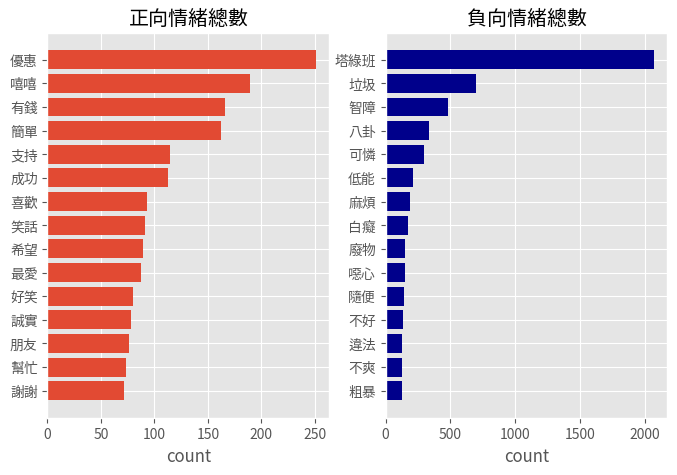

In [ ]:
p_sum = negative_article[negative_article["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = negative_article[negative_article["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

**情緒關鍵字:正面情緒文章**

In [ ]:
positive_article = (positive_article.merge(df_liwc, on='word')
                    .groupby(['word', 'sentiments'], as_index=False)
                    .size()
                    .sort_values('size', ascending = False))

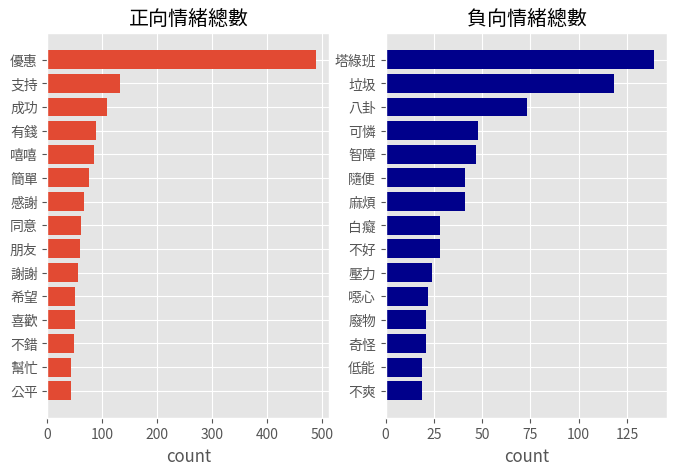

In [ ]:
p_sum = positive_article[positive_article["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = positive_article[positive_article["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

正面文章跟負面文章中的正負面情緒文字並無太大的差別

# **分析PTT Gossip版的五倍券相關文章之詞彙關係**

#**1.安裝套件**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import re
import jieba
import jieba.analyse
from datetime import datetime
from wordcloud import WordCloud 
import math
from nltk import ngrams
from collections import defaultdict
from nltk import FreqDist
from collections import Counter, namedtuple
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from numpy.linalg import norm

In [ ]:
# cloab 字體設定
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2021-12-03 02:40:08--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.23.102, 74.125.23.101, 74.125.23.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/99ujle0nqpkf6hupdc0aeqs92s8pe8js/1638499200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-03 02:40:13--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/99ujle0nqpkf6hupdc0aeqs92s8pe8js/1638499200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.1

#**2.資料前處理**

##**2.1基本資料介紹**
*   資料來源：文字平台收集PTT Gossip版2021-09-14 ~ 2021-11-14 所有文章
*   資料集：/content/drive/MyDrive/hw/期中報告資料 2/new五倍券_articleMetaData.csv
*   關鍵字：五倍券、數位、紙本、綁定、振興、紓困
*   資料時間：2021-09-14 ~ 2021-11-14

In [ ]:
MetaData = pd.read_csv('/content/drive/MyDrive/期中專案報告/final五倍券/final五倍券rawdata/final五倍券.csv', encoding='UTF-8')

##**2.2資料清理**
*   去除NA值
*   去除特殊字元與標點符號


In [ ]:
MetaData.sentence.isna().values.any() #資料中有na值

True

In [ ]:
MetaData[MetaData.sentence.isna()] #有na值得資料

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
1178,[問卦]綁定數位五倍券任選兩張加碼券不好嗎？,2021/10/26,04:04:41,https://www.ptt.cc/bbs/Gossiping/M.1635221083....,waterblue798,Gossiping,7,3,0,NaN


In [ ]:
MetaData = MetaData[~MetaData.sentence.isna()] # 去除na值
MetaData.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...
1,Fw:[情報]振興五倍券官網,2021/09/15,04:22:08,https://www.ptt.cc/bbs/Gossiping/M.1631679729....,kinjk01,Gossiping,76,8,41,作者曆仔看板標題情報振興五倍券官網時間剛看官網已經開了下午預計唐鳳政委會出來說明當中關於各部...
2,[新聞]振興五倍券官網上線加碼券連4周抽最多,2021/09/15,05:53:39,https://www.ptt.cc/bbs/Gossiping/M.1631685223....,kinjk01,Gossiping,34,5,20,聯合報陳熙文振興五倍券官網上線加碼券連周抽最多有次中籤機會行政院推動振興五倍券於月日正式上路...


In [ ]:
#移除PTT貼新聞時會出現的格式用字
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('(媒體來源|記者署名|完整新聞標題|完整新聞內文|完整新聞連結|(或短網址)|備註:|備註請放最後面|違者新聞文章刪除)', '', x))
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('(http|https)://.*', '', x))
#只留下中文字
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '',x))

In [ ]:
MetaData.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...
1,Fw:[情報]振興五倍券官網,2021/09/15,04:22:08,https://www.ptt.cc/bbs/Gossiping/M.1631679729....,kinjk01,Gossiping,76,8,41,作者曆仔看板標題情報振興五倍券官網時間剛看官網已經開了下午預計唐鳳政委會出來說明當中關於各部...
2,[新聞]振興五倍券官網上線加碼券連4周抽最多,2021/09/15,05:53:39,https://www.ptt.cc/bbs/Gossiping/M.1631685223....,kinjk01,Gossiping,34,5,20,聯合報陳熙文振興五倍券官網上線加碼券連周抽最多有次中籤機會行政院推動振興五倍券於月日正式上路...


##**2.3文章斷詞**

In [ ]:
#設定繁體中文詞庫
jieba.set_dictionary('/content/drive/MyDrive/期中專案報告/final五倍券/dict/dict.txt.big')

#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('/content/drive/MyDrive/期中專案報告/final五倍券/dict/stopwords.txt') as f:
    stopWords = [line.strip() for line in f.readlines()]

In [ ]:
# 設定斷詞 function
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [ ]:
data = MetaData.copy()
data['word'] = data.sentence.apply(getToken)

Building prefix dict from /content/drive/MyDrive/期中專案報告/final五倍券/dict/dict.txt.big ...
Loading model from cache /tmp/jieba.uc8aa4f8437980ff185d56d622ecc8c27.cache
Loading model cost 1.486 seconds.
Prefix dict has been built successfully.


In [ ]:
# 將word欄位展開
data = data.explode('word')

In [ ]:
data.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,胎嘎賀
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,給賀
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,大木


In [ ]:
#計算各詞彙在各文章中出現的次數
word_count = data.groupby(['artUrl','word'],as_index=False).size()
word_count.rename(columns={'size': 'count'}, inplace=True)

In [ ]:
word_count

,artUrl,word,count
0,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,一隻,1
1,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,三口,1
2,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,下手,1
3,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,五倍,1
4,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,券才,1
...,...,...,...
49910,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,電視,1
49911,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,面臨,1
49912,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,首度,1
49913,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,黨外,1


# **3. TF-IDF**
TF-IDF 是一種統計方法，可用來評估單詞對於文件的集合的重要程度

##**3.1 計算每篇文章的詞數**

In [ ]:
total_words = data.groupby(['artUrl'],as_index=False).size()
total_words.rename(columns={'size': 'total'}, inplace=True)
total_words

,artUrl,total
0,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,26
1,https://www.ptt.cc/bbs/Gossiping/M.1631679729....,40
2,https://www.ptt.cc/bbs/Gossiping/M.1631685223....,146
3,https://www.ptt.cc/bbs/Gossiping/M.1631686465....,23
4,https://www.ptt.cc/bbs/Gossiping/M.1631686915....,11
...,...,...
1208,https://www.ptt.cc/bbs/Gossiping/M.1635409979....,54
1209,https://www.ptt.cc/bbs/Gossiping/M.1635410106....,24
1210,https://www.ptt.cc/bbs/Gossiping/M.1635416307....,20
1211,https://www.ptt.cc/bbs/Gossiping/M.1635422396....,50


##**3.2 合併需要的資料欄位**
*   合併 每個詞彙在每個文章中出現的次數 與 每篇文章的詞數
*   新增各個詞彙在所有詞彙中的總數欄位



In [ ]:
coupon_words = word_count.merge(total_words,on = 'artUrl',how = 'left')
coupon_words

,artUrl,word,count,total
0,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,一隻,1,26
1,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,三口,1,26
2,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,下手,1,26
3,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,五倍,1,26
4,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,券才,1,26
...,...,...,...,...
49910,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,電視,1,145
49911,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,面臨,1,145
49912,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,首度,1,145
49913,https://www.ptt.cc/bbs/Gossiping/M.1635426878....,黨外,1,145


##**3.3 計算 tf-idf 值**
*   以每篇文章爲單位，計算每個詞彙的 tf-idf 值
  *   TF (Term Frequency):某一個詞彙在某一個文件中所出現的頻率。
      詞彙在該文件中出現次數 / 該文件中詞彙總數
  *   IDF (Inverse Document Frequent):為文件數除以某特定詞彙有被多少文件所提及的數量取 log。評估詞彙在文集的獨特性
log( 總文件數量 / 包含該詞彙的文件數量 )







In [ ]:
#計算tf
coupon_words_tf_idf = coupon_words.assign(tf = coupon_words.iloc[:,2]/coupon_words.iloc[:,3])

In [ ]:
# 計算每個詞彙出現在幾篇文章中
idf_df = coupon_words.groupby(['word'],as_index=False).size()
coupon_words_tf_idf = coupon_words_tf_idf.merge(idf_df,on = 'word',how = 'left')

In [ ]:
#計算idf
coupon_words_tf_idf = coupon_words_tf_idf.assign(idf = coupon_words_tf_idf.iloc[:,5]
                                               .apply(lambda x: math.log((len(total_words)/x),10)))

coupon_words_tf_idf = coupon_words_tf_idf.drop(labels=['size'],axis=1)

In [ ]:
#計算tf*idf
coupon_words_tf_idf = coupon_words_tf_idf.assign(tf_idf = coupon_words_tf_idf.iloc[:,4]*coupon_words_tf_idf.iloc[:,5])

In [ ]:
coupon_words_tf_idf.head()

,artUrl,word,count,total,tf,idf,tf_idf
0,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,一隻,1,26,0.038462,2.129618,0.081908
1,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,三口,1,26,0.038462,3.083861,0.118610
2,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,下手,1,26,0.038462,3.083861,0.118610
3,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,五倍,1,26,0.038462,0.126254,0.004856
4,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,券才,1,26,0.038462,2.384891,0.091727


##**3.4檢視結果**

In [ ]:
# 選出每篇文章，tf-idf值最大的五個詞
group = coupon_words_tf_idf.groupby("artUrl").apply(lambda x : x.nlargest(5, "tf_idf"))

In [ ]:
group.loc[:,["word","tf_idf"]][0:15]

word    tf_idf
artUrl                                                               
https://www.ptt.cc/bbs/Gossiping/M.1631644776.A... 13    徵收  0.300778
                                                   1     三口  0.118610
                                                   2     下手  0.118610
                                                   8     大木  0.118610
                                                   12    庫克  0.118610
https://www.ptt.cc/bbs/Gossiping/M.1631679729.A... 58    部份  0.109039
                                                   37    各部  0.079625
                                                   30   先拿外  0.077097
                                                   33   券才行  0.077097
                                                   42    情報  0.077097
https://www.ptt.cc/bbs/Gossiping/M.1631685223.A... 94    抽籤  0.129145
                                                   114   每周  0.050996
                                                   71    五點  0.042245
                                                   97    振興  0.038167
                                                   80    加碼  0.036492

**計算整個文集中較常 tf-idf 值高的字**

In [ ]:
# 從每篇文章挑選出tf-idf最大的十個詞
(coupon_words_tf_idf.groupby("artUrl").apply(lambda x : x.nlargest(10, "tf_idf")).reset_index(drop=True)
# 計算每個詞被選中的次數
.groupby(['word'],as_index=False).size()
).sort_values('size', ascending=False).head(10) #排序看前十名

,word,size
550,五倍,84
5618,綁定,57
3983,數位,55
5549,紙本,36
5130,登記,31
7335,食券,30
2112,回饋,30
7005,銀行,29
5004,現金,29
4261,有沒有,28


#**4. 透過結巴斷詞與N-gram幫助建立字典**

##**4.1 Bigram**

In [ ]:
# 設定 bigram 斷詞 function
def bigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    seg_list = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [ ]:
coupon_bigram = MetaData.copy()
coupon_bigram["word"] = coupon_bigram.sentence.apply(bigram_getToken)



In [ ]:
coupon_bigram = coupon_bigram.explode('word')
coupon_bigram.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,胎嘎賀 給賀
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,給賀 大木
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,大木 想必


**統計最常出現的bigram組合**

In [ ]:
# 計算每個組合出現的次數
coupon_bigram_count = coupon_bigram.groupby(["word"],as_index=False).size()

In [ ]:
# 清除包含英文或數字的bigram組合
wb_filter = list(coupon_bigram_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
coupon_bigram_count[wb_filter].sort_values(by=['size'], ascending=False).head(10)

,word,size
26921,數位 綁定,274
24137,振興 五倍,163
26803,數位 五倍,111
39302,紙本 五倍,71
39951,綁定 數位,64
3530,五倍 券官網,59
39795,綁定 五倍,50
3853,五倍 數位,50
51796,電子 支付,47
26877,數位 支付,46


##**4.2 Trigram**

In [ ]:
# 設定 trigram 斷詞 function
def trigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    seg_list = ngrams(seg_list, 3)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [ ]:
coupon_trigram = MetaData.copy()
coupon_trigram["word"] = coupon_trigram.sentence.apply(trigram_getToken)
coupon_trigram = coupon_trigram.explode('word')
coupon_trigram.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,胎嘎賀 給賀 大木
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,給賀 大木 想必
0,[問卦]要徵收多少個五倍券可以買一隻IPone13,2021/09/14,18:39:33,https://www.ptt.cc/bbs/Gossiping/M.1631644776....,LouisLEE,Gossiping,3,0,2,各位胎嘎賀打給賀我大木啦借一下剛看到的圖想必庫克叔叔是聽到台灣月有元可拿就準備來收割了的配置...,大木 想必 庫克


**統計最常出現的trigram組合**

In [ ]:
# 計算每個組合出現的次數
coupon_trigram_count = coupon_trigram.groupby(["word"],as_index=False).size()
# 清除包含英文或數字的trigram組合
wb_filter = list(coupon_trigram_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
coupon_trigram_count[wb_filter].sort_values(by=['size'], ascending=False).head(10)

,word,size
4652,五倍 數位 綁定,40
57452,開放 數位 綁定,30
45421,綁定 數位 五倍,20
57794,關貿 網路 公司,19
13754,台北 市長 柯文,16
14183,台灣 民意 基金會,13
17358,基本工資 審議 委員會,13
49699,行政院 振興 五倍,12
32955,最新 民意 顯示,12
30615,數位 綁定 五倍,11


#**5.使用自建字典**

In [ ]:
#新增五倍券相關自定義字典
jieba.load_userdict('/content/drive/MyDrive/期中專案報告/final五倍券/dict/五倍券user_dict.txt')

**使用自建辭典進行斷詞與計算**

In [ ]:
#剛才的斷詞結果沒有使用新增的辭典，因此我們重新進行斷詞
data2 = MetaData.copy()
data2['word'] = data2.sentence.apply(getToken)
data2 = data2.explode('word')

In [ ]:
#再次計算各詞彙在各文章中出現的次數
word_count2 = data2.groupby(['artUrl','word'],as_index=False).size()
word_count2.rename(columns={'size': 'count'}, inplace=True)

In [ ]:
wb_filter = list(word_count2["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
word_count2 = word_count2[wb_filter].sort_values(by=['count'], ascending=False)
word_count2.head(10)

,artUrl,word,count
44689,https://www.ptt.cc/bbs/Gossiping/M.1634691435....,食券,31
29912,https://www.ptt.cc/bbs/Gossiping/M.1633680226....,食券,30
44494,https://www.ptt.cc/bbs/Gossiping/M.1634691435....,店家,26
6013,https://www.ptt.cc/bbs/Gossiping/M.1632268031....,抽籤,25
44437,https://www.ptt.cc/bbs/Gossiping/M.1634691435....,台灣,24
10880,https://www.ptt.cc/bbs/Gossiping/M.1632296508....,台北,23
44890,https://www.ptt.cc/bbs/Gossiping/M.1634702282....,唐鳳,21
29132,https://www.ptt.cc/bbs/Gossiping/M.1633664640....,基本工資,20
44579,https://www.ptt.cc/bbs/Gossiping/M.1634691435....,登記,20
38087,https://www.ptt.cc/bbs/Gossiping/M.1633947303....,外帶,20


#**6.建立Ngram預測模型**

In [ ]:
data3 = MetaData.copy()
sen_tokens = data3.sentence.apply(getToken).tolist()

In [ ]:
def ngram(documents, N=2):
    ngram_prediction = dict()
    total_grams = list()
    words = list()
    Word = namedtuple('Word', ['word', 'prob'])

    for doc in documents:
        #加上開頭和結尾 tag
        split_words = ['<s>'] + list(doc) + ['</s>']
        # 計算分子
        [total_grams.append(tuple(split_words[i:i+N])) for i in range(len(split_words)-N+1)]
        # 計算分母
        [words.append(tuple(split_words[i:i+N-1])) for i in range(len(split_words)-N+2)]
        
    total_word_counter = Counter(total_grams)
    word_counter = Counter(words)
    
    for key in total_word_counter:
        word = ''.join(key[:N-1])
        if word not in ngram_prediction:
            ngram_prediction.update({word: set()})
            
        next_word_prob = total_word_counter[key]/word_counter[key[:N-1]] #P(B|A)
        w = Word(key[-1], '{:.3g}'.format(next_word_prob))
        ngram_prediction[word].add(w)
        
    return ngram_prediction

In [ ]:
#Bigram預測模型為例
bi_prediction = ngram(sen_tokens, N=2)

**預測下一個出現的詞**

In [ ]:
text = '數位'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 紙本, probability: 0.0909
next word: 綁定, probability: 0.0455
next word: 優惠, probability: 0.0394
next word: 加碼, probability: 0.0364
next word: 振興, probability: 0.0333


In [ ]:
text = '支付'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 方式, probability: 0.114
next word: 綁定, probability: 0.0682
next word: 工具, probability: 0.053
next word: 信用卡, probability: 0.053
next word: 台灣, probability: 0.0379


#**7. Bigram視覺化**

In [ ]:
# 使用FreqDist 取得 bigram 斷詞 與 bigram出現頻率
bigramfdist = FreqDist()
def bigram_getToken_dict(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    bigramfdist.update(ngrams(seg_list, 2))
    seg_list2 = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list2)]
    return seg_list

In [ ]:
coupon_bigram2 = MetaData.copy()
coupon_bigram2["word"] = coupon_bigram2.sentence.apply(bigram_getToken_dict)

In [ ]:
coupon_bigram2 = coupon_bigram2.explode('word')
# coupon_bigram2.head(3)

In [ ]:
# 看一下bigramfdist內容
bigramfdist.most_common(5)

[(('振興', '五倍券'), 153),
 (('紙本', '五倍券'), 71),
 (('有沒有', '八卦'), 43),
 (('五倍券', '數位綁定'), 39),
 (('綁定', '數位'), 37)]

In [ ]:
#建立bigram和count的dictionary
#這裡取最多的前30項
d = {k:v for k,v in bigramfdist.most_common(30)}

In [ ]:
# Create network plot 
G = nx.Graph()

# 建立 nodes 間的連結
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v)
    
# 取得edge權重
weights = [w[2]['weight']*0.3 for w in  G.edges(data=True)]

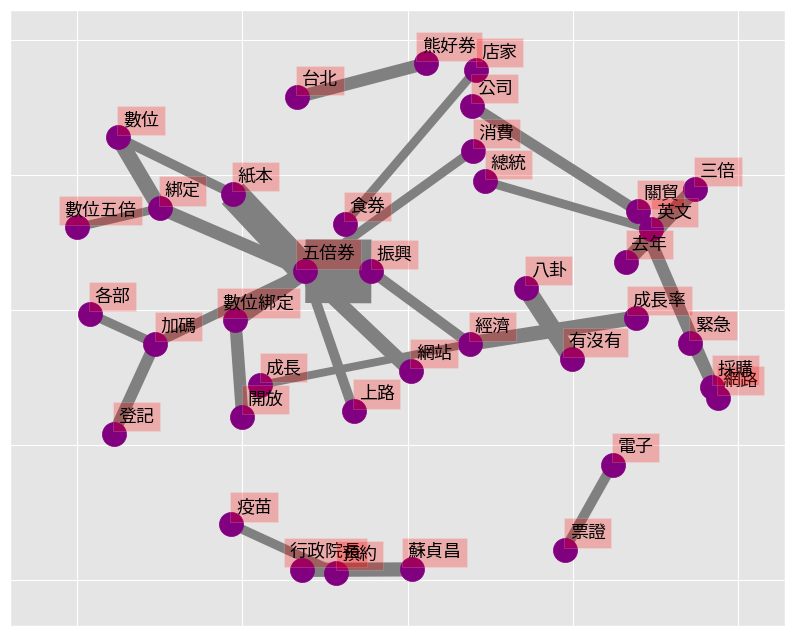

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

透過上面所建立的bigram和count,我們選擇最常出現的前30大詞彙組合來製作出該關係圖，可以發現「數位 五倍券」、「數位 綁定」、「數位 支付」這幾個組合線特別粗，代表這幾個組合是最常被提及的字詞組合

#**8.Pairwise correlation**
計算兩個詞彙間的相關性 Phi相關係數(Phi coefficient)

In [ ]:
#取常一起出現的bigram pair 前500筆
b = {k:v for k,v in bigramfdist.most_common(500)}
# b.items()

In [ ]:
#建立DataFrame
bigram_df = pd.DataFrame(columns=['word', 'word2','n'])
for k,v in b.items():
    bigram_df = bigram_df.append({'word':k[0], 'word2':k[1], 'n':v}, ignore_index=True)

In [ ]:
#計算phi值
def phi_cor(df):
    #total x
    nx = len(set(word_count2[word_count2["word"]==df["word"]]["artUrl"]))
    tnx = len(MetaData)-nx
    #total y
    ny = len(set(word_count2[word_count2["word"]==df["word2"]]["artUrl"]))
    tny = len(MetaData)-ny
    #有x 有y
    x_ls = list(word_count2[word_count2["word"]==df["word"]]["artUrl"]) #單獨有x
    y_ls = list(word_count2[word_count2["word"]==df["word2"]]["artUrl"]) #單獨有y
    nxy = len(set(x_ls)&set(y_ls)) #取交集
    #有x 沒有y
    nxo = nx-nxy
    #沒有x 沒有y
    uxy = set(x_ls)|set(y_ls) #取聯集
    noo = len(set(list(MetaData["artUrl"]))-uxy) #取差集:全-有x有y
    #沒有x 有y
    noy = ny-nxy
    #print(nx,ny,tny,tnx,nxy,noo,nxo,noy)
    phi = (nxy*noo-nxo*noy)/math.sqrt(nx*ny*tny*tnx)
    
    return phi

In [ ]:
bigram_df["cor"] = bigram_df.apply(phi_cor, axis=1)
bigram_df = bigram_df[bigram_df["word"]!=bigram_df["word2"]]



In [ ]:
bigram_df

,word,word2,n,cor
0,振興,五倍券,153,0.167169
1,紙本,五倍券,71,0.011406
2,有沒有,八卦,43,0.417858
3,五倍券,數位綁定,39,0.096014
4,綁定,數位,37,0.319133
...,...,...,...,...
495,優惠,民眾,5,0.178659
496,加碼,措施,5,0.180342
497,流量,管制,5,0.228671
498,數位,綁訂,5,0.154572


##**8.1 和 紙本, 數位 相關性最高的 15 個詞彙**

In [ ]:
c_sum = bigram_df[(bigram_df["word"]=="紙本")].sort_values(by=['cor'], ascending = False).head(15)
b_sum = bigram_df[(bigram_df["word"]=="數位")].sort_values(by=['cor'], ascending = False).head(15)

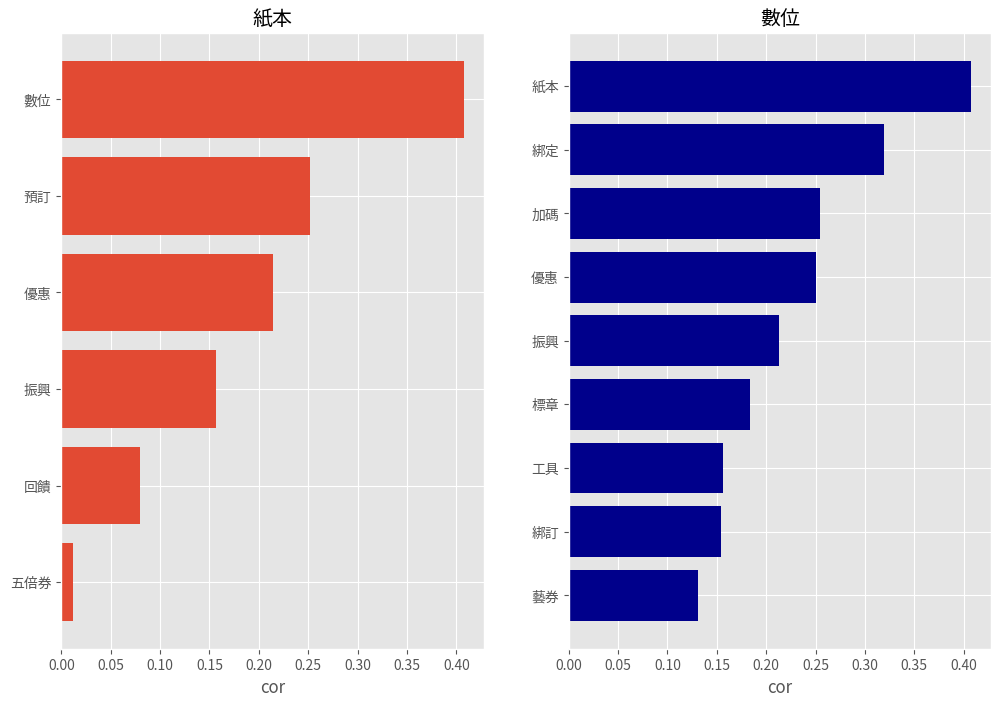

In [ ]:
c_sum = c_sum.sort_values(by=['cor'])
b_sum = b_sum.sort_values(by=['cor'])

plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('紙本')
plt.xlabel('cor')
plt.barh(c_sum['word2'],c_sum['cor'])

plt.subplot(122)
plt.title('數位')
plt.xlabel('cor')
plt.barh(b_sum['word2'],b_sum['cor'],color="darkblue")


plt.show()

由上面兩張圖我們可以看出：和「紙本」相關性最高的前五名詞彙為「數位」、「預訂」、「優惠」、「回饋」、「五倍券」;和「數位」相關性最高的前五名詞彙為「綁定」、「紙本」、「支付」、「加碼」、「振興五倍券」等,可以看出不管是數位還是紙本都在關心優惠。

##**8.2使用詞彙關係圖畫出相關性大於0.4的組合**

In [ ]:
bigram_df[bigram_df["cor"]>0.4]

,word,word2,n,cor
2,有沒有,八卦,43,0.417858
6,去年,三倍,36,0.475603
9,行政院長,蘇貞昌,34,0.765063
11,數位,紙本,30,0.407621
16,關貿,公司,26,0.475666
...,...,...,...,...
468,超前,部署,5,0.844454
469,蓮霧,釋迦,5,0.912493
472,編列,億元,5,0.455121
478,健保,快易通,5,0.523763


In [ ]:
word_cors = bigram_df[bigram_df["cor"]>0.4]
word_cors.reset_index(inplace=True, drop=True)

In [ ]:
import networkx as nx
# Create network plot 
g = nx.Graph()

# 建立 nodes 間的連結
for i in range(len(word_cors)):
    g.add_edge(word_cors["word"][i], word_cors["word2"][i], weight=word_cors["cor"][i])
    
# 取得edge權重
weights = [w[2]['weight']*10 for w in  g.edges(data=True)]

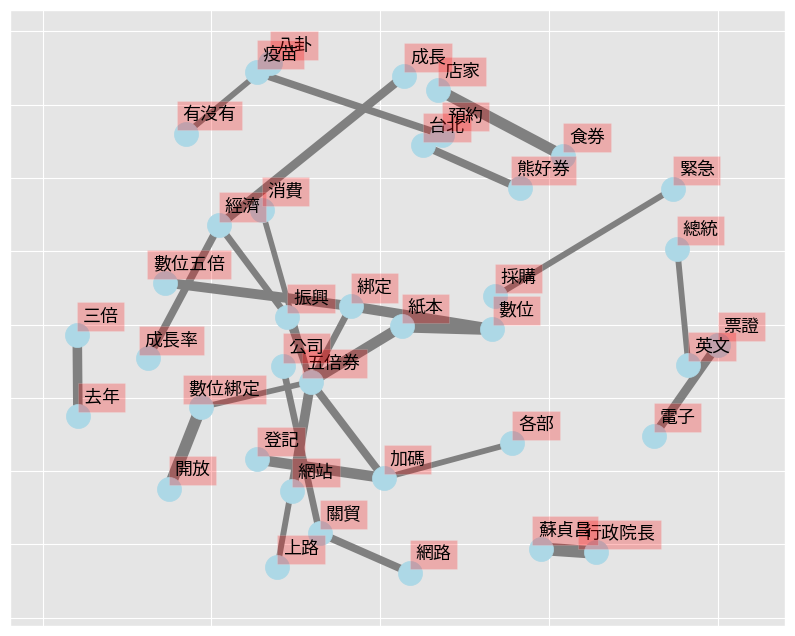

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

可以看出此圖與上面bigram視覺化的結果相似，相關性大於0.4的組合有「店家 好食券」、「經濟 振興」、「台北 熊好券」。除了討論五倍券以外其他加碼券的討論聲量也很高。

#**9.計算文章相似度**
以TF-IDF的結果當作文章的向量，計算 Cosine Similarity 找出相似的文章

In [ ]:
data_cos= MetaData.copy()
data_cos = data_cos.loc[:,["artTitle","artDate","artUrl","sentence"]]
# 需要改成使用空格連接斷好的詞
data_cos['word'] = data_cos.sentence.apply(getToken).map(' '.join)

In [ ]:
# Bag of Word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_cos["word"])
vocabulary = vectorizer.get_feature_names()
# 轉成dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,一一,一下子,一下子把,一个,一之軒,一事,一二三,一五,一人,一人領,一件,一任,一份,一位,一來一往,一個個,一個多月,一個月,一個樣,一倍,一傳十,一億,一元,一先,一兩,一兩千,一兩句,一兩天,一兩萬,一共,一再,一再強調,一出,一出場,一切辦法,一切都是,一到,一刷,一副,一劑,...,點開,點閱,點餐,點點,黨內,黨則,黨團,黨外,黨工,黨庫,黨政,黨政軍,黨派,黨產會,黨立委,黨籍,黨繼,黨證,黨養,黴體,鼎王,鼓勵,鼓鼓掌,鼻子,鼻祖,鼻酸,鼻頭,齊心,齊心合力,齊聲,齊酸網,齊頭式,齒輪油,龍山寺,龍說,龍雞,龍頭,龐大,龔明鑫,龜笑
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
transformer = TfidfTransformer()  
print(transformer) 
#將詞頻矩陣X統計成TF-IDF值
tfidf = transformer.fit_transform(X)  
# print(tfidf.toarray())

# 轉成dataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())
TFIDF_df.head()

TfidfTransformer()


,一一,一下子,一下子把,一个,一之軒,一事,一二三,一五,一人,一人領,一件,一任,一份,一位,一來一往,一個個,一個多月,一個月,一個樣,一倍,一傳十,一億,一元,一先,一兩,一兩千,一兩句,一兩天,一兩萬,一共,一再,一再強調,一出,一出場,一切辦法,一切都是,一到,一刷,一副,一劑,...,點開,點閱,點餐,點點,黨內,黨則,黨團,黨外,黨工,黨庫,黨政,黨政軍,黨派,黨產會,黨立委,黨籍,黨繼,黨證,黨養,黴體,鼎王,鼓勵,鼓鼓掌,鼻子,鼻祖,鼻酸,鼻頭,齊心,齊心合力,齊聲,齊酸網,齊頭式,齒輪油,龍山寺,龍說,龍雞,龍頭,龐大,龔明鑫,龜笑
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065226,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 計算 cosine_similarity
def cosine_similarity(vector):
    cos_list = []
    for i in tfidf.toarray():
        score = np.dot(vector, i)  / (norm(vector) * norm(i))
        cos_list.append(score)
    df = pd.DataFrame(cos_list, columns=["cos_similarity"])
    return df


找和第一篇文章相似的其他文章

In [ ]:
print(tfidf.toarray()[1])
cos_df = cosine_similarity(tfidf.toarray()[1])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
cos_df = cos_df.merge(data_cos, how = 'left', left_index=True, right_index=True)
# cos_df.head()
cos_df.loc[:,["cos_similarity","artTitle"]].sort_values(by=['cos_similarity'], ascending=False).head(10)

,cos_similarity,artTitle
1,1.000000,Fw:[情報]振興五倍券官網
2,0.174445,[新聞]振興五倍券官網上線加碼券連4周抽最多
122,0.167082,[新聞]八部會加碼券總整理！抽籤方法、時程一
1198,0.153083,[問卦]悠遊卡五倍券靠卡儲值
981,0.146186,[新聞]國旅券首批抽60萬張快對身分證字號
169,0.129116,[新聞]數位五倍劵開搶當機！首頁出現亂碼「滚」
185,0.120561,[新聞]想清楚再登記！全民今搶8大加碼券最高可
500,0.113606,Re:[新聞]數位五倍券落後紙本 金管會要電支、銀
1018,0.108727,[新聞]有中嗎？農遊券獎號出爐 身分證「這6組
99,0.105408,[問卦]5倍券官網


# **結論**
1. 可以看出9/22數位綁定後討論聲量徒增，但是系統不堪負荷導致網友抱怨連連負面情緒高漲
2. 10/08開始使用五倍券後民眾負面情緒有所減緩
3. 可以從相關性看出不管是選擇紙本或是綁定數位的民眾都很在意優惠的部分